In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [19]:
pandemic_data = pd.read_csv('dataset/transformed_pandemic_data1.csv')
pandemic_data.head(10)

,Unnamed: 0,location,month,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,0,Afghanistan,1,0,0,0.000000,38928341,1803.987,0.498
1,1,Afghanistan,2,1,0,2.010690,38928341,1803.987,0.498
2,2,Afghanistan,3,141,17,40.831935,38928341,1803.987,0.498
3,3,Afghanistan,4,1949,794,80.740000,38928341,1803.987,0.498
4,4,Afghanistan,5,14525,4814,84.260000,38928341,1803.987,0.498
5,5,Afghanistan,6,31238,14418,80.182667,38928341,1803.987,0.498
6,6,Afghanistan,7,36542,33013,78.700000,38928341,1803.987,0.498
7,7,Afghanistan,8,38162,41919,55.408710,38928341,1803.987,0.498
8,8,Afghanistan,9,39254,42914,23.520000,38928341,1803.987,0.498
9,9,Afghanistan,10,40200,27986,33.575789,38928341,1803.987,0.498


In [14]:
pandemic_data.shape

(48301, 12)

In [20]:
# Rename columns
pandemic_data = pandemic_data.rename(columns = {'location':'loc', 'stringency_index': 'SI', 'population': 'pop', 'gdp_per_capita':'GDP', 'human_development_index': 'HDI'})
pandemic_data.columns

Index(['Unnamed: 0', 'loc', 'month', 'total_cases', 'total_deaths', 'SI',
       'pop', 'GDP', 'HDI'],
      dtype='object')

In [21]:
index_names = pandemic_data[(pandemic_data['SI'] == 0.0) & (pandemic_data['total_deaths'] == 0) & (pandemic_data['total_cases'] == 0)].index
pandemic_data.drop(index_names, inplace = True)

In [22]:
# Filter out India's data

india_pandemic_data = pandemic_data.loc[pandemic_data['loc'] == 'India']
india_pandemic_data

,Unnamed: 0,loc,month,total_cases,total_deaths,SI,pop,GDP,HDI
798,798,India,1,1,0,2.151613,1380004385,6426.674,0.64
799,799,India,2,3,0,10.190000,1380004385,6426.674,0.64
800,800,India,3,1251,188,54.703871,1380004385,6426.674,0.64
801,801,India,4,33050,13055,98.643333,1380004385,6426.674,0.64
802,802,India,5,182143,89793,82.078710,1380004385,6426.674,0.64
803,803,India,6,566840,319690,76.280000,1380004385,6426.674,0.64
804,804,India,7,1638870,793511,76.702903,1380004385,6426.674,0.64
805,805,India,8,3621245,1553468,79.764516,1380004385,6426.674,0.64
806,806,India,9,6225763,2443314,79.105000,1380004385,6426.674,0.64
807,807,India,10,7550273,2034308,50.364737,1380004385,6426.674,0.64


In [65]:
india_pandemic_data["cases_daily"]=india_pandemic_data["total_cases"].diff()
india_pandemic_data['cases_daily']=india_pandemic_data['cases_daily'].fillna(0)
india_pandemic_data

<ipython-input-65-f201d47cbb79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_pandemic_data["cases_daily"]=india_pandemic_data["total_cases"].diff()
<ipython-input-65-f201d47cbb79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_pandemic_data['cases_daily']=india_pandemic_data['cases_daily'].fillna(0)


,Unnamed: 0,loc,month,total_cases,total_deaths,SI,pop,GDP,HDI,cases_daily
798,798,India,1,1,0,2.151613,1380004385,6426.674,0.64,0.0
799,799,India,2,3,0,10.190000,1380004385,6426.674,0.64,2.0
800,800,India,3,1251,188,54.703871,1380004385,6426.674,0.64,1248.0
801,801,India,4,33050,13055,98.643333,1380004385,6426.674,0.64,31799.0
802,802,India,5,182143,89793,82.078710,1380004385,6426.674,0.64,149093.0
803,803,India,6,566840,319690,76.280000,1380004385,6426.674,0.64,384697.0
804,804,India,7,1638870,793511,76.702903,1380004385,6426.674,0.64,1072030.0
805,805,India,8,3621245,1553468,79.764516,1380004385,6426.674,0.64,1982375.0
806,806,India,9,6225763,2443314,79.105000,1380004385,6426.674,0.64,2604518.0
807,807,India,10,7550273,2034308,50.364737,1380004385,6426.674,0.64,1324510.0


### Lets create a scatter plot to figure out the if there is a linear relationship between the two variables

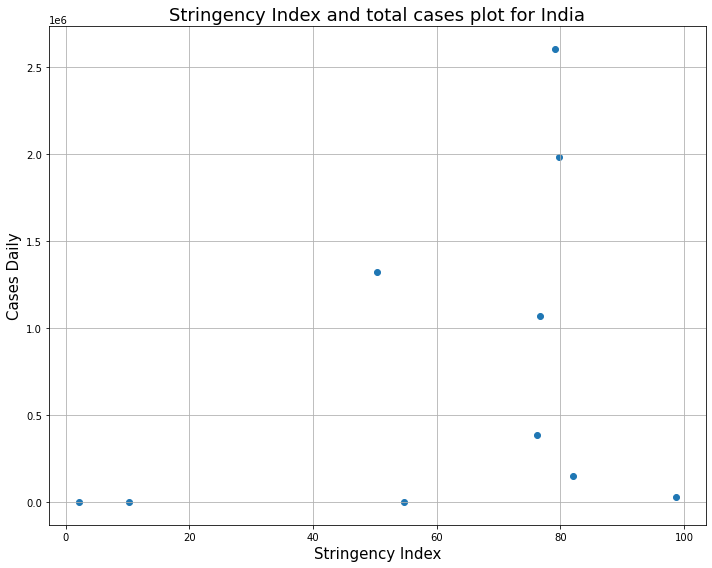

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8, forward=True)
# ax.scatter(pandemic_data['SI'], pandemic_data['GDP'])
ax.scatter(india_pandemic_data['SI'], india_pandemic_data['cases_daily'])
ax.set_xlabel('Stringency Index', fontsize=15)
ax.set_ylabel('Cases Daily', fontsize=15)
ax.set_title('Stringency Index and total cases plot for India', fontsize=18)
ax.grid(which='both')
plt.tight_layout()

### Regression variable -
    y is dependant
    x is independant

In [67]:
x = india_pandemic_data['SI']
y = india_pandemic_data['cases_daily']
# y2 = india_pandemic_data['total_deaths']

In [71]:
x

798     2.151613
799    10.190000
800    54.703871
801    98.643333
802    82.078710
803    76.280000
804    76.702903
805    79.764516
806    79.105000
807    50.364737
Name: SI, dtype: float64

In [72]:
y

798          0.0
799          2.0
800       1248.0
801      31799.0
802     149093.0
803     384697.0
804    1072030.0
805    1982375.0
806    2604518.0
807    1324510.0
Name: cases_daily, dtype: float64

#### Model Validation

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

print(x_train)
print(y_train)

[[76.28      ]
 [ 2.1516129 ]
 [79.76451613]
 [76.70290323]
 [50.36473684]
 [79.105     ]
 [82.07870968]
 [10.19      ]]
803     384697.0
798          0.0
805    1982375.0
804    1072030.0
807    1324510.0
806    2604518.0
802     149093.0
799          2.0
Name: cases_daily, dtype: float64


In [74]:
model.fit(x_train, y_train)

LinearRegression()

In [75]:
model.coef_

array([16440.32843768])

In [76]:
model.score(x_train, y_train)

0.3070944966847674

Fitting the dataset into Linear Regression Model

In [91]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [92]:
# calculated co-efficients
regressor.coef_

array([16440.32843768])

In [93]:
# predicting
y_pred= regressor.predict(x_test) 
y_pred

array([ 900593.96451493, 1622973.15718044])

In [94]:
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))

Train Score:  0.3070944966847674
Test Score:  -7157.321491836609


In [95]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

1670329181184.0774

In [96]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

# Feature Selection using correlation

In [97]:
# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')

In [98]:
# learn relationship from training data
f_selector.fit(x_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x1230df0d0>)

In [99]:
# transform train input data
x_train_fs = f_selector.transform(x_train)
# transform test input data
x_test_fs = f_selector.transform(x_test)

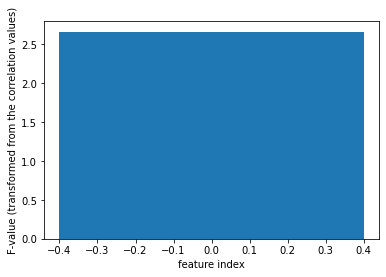

In [100]:
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()